In [ ]:
import os

import dask.dataframe as dd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
enriched_points = dd.read_csv(
    "./anglova_metrics_enriched/points_enriched_metrics.csv",
).compute()
enriched_points["t"] = pd.to_datetime(enriched_points["t"])
enriched_trajectories_df = pd.read_csv(
    "./anglova_metrics_enriched/trajectories_enriched_metrics.csv",
)
output_path = "./assets/Speed Over Time/"

In [27]:
def save_plot(filename):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    plt.savefig(
        f"{output_path}/{filename}.png",
        bbox_inches="tight",
    )
    plt.savefig(
        f"{output_path}/{filename}.pdf",
        bbox_inches="tight",
    )

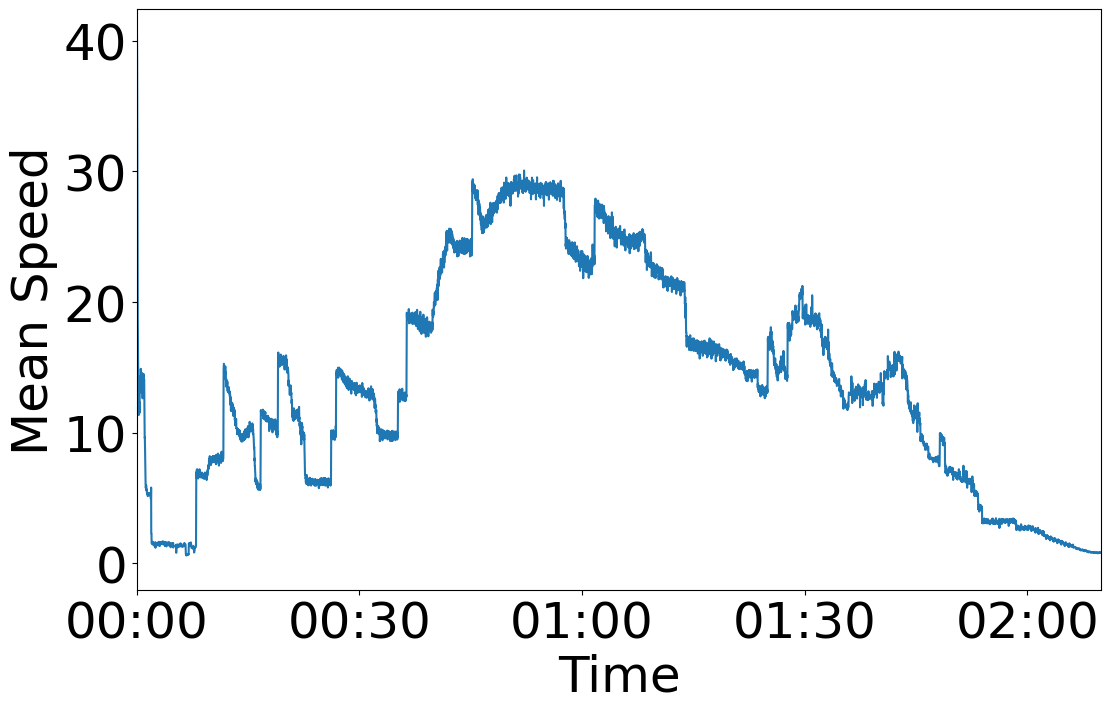

In [38]:
# Your existing code
plt.rcParams.update({"font.size": 36, "font.weight": "normal"})
mean_speed_per_second = enriched_points.groupby("t")["speed"].mean()
fig, ax = plt.subplots(figsize=(12, 8))
mean_speed_per_second.plot(ax=ax, xlabel="Time", ylabel="Mean Speed")

if not mean_speed_per_second.empty:
    # Convert the index to datetime objects if it's not already
    if not isinstance(mean_speed_per_second.index, pd.DatetimeIndex):
        mean_speed_per_second.index = pd.to_datetime(mean_speed_per_second.index)

    # Determine the first and last timestamp
    start_time = mean_speed_per_second.index.min()
    end_time = mean_speed_per_second.index.max()

    # Generate timestamps at 10-minute intervals
    ten_minute_intervals = pd.date_range(start=start_time.floor('30min'),
                                         end=end_time.ceil('30min'),
                                         freq='30min')

    # Filter these intervals to include only those present in your data's index
    tick_locations = mean_speed_per_second.index[mean_speed_per_second.index.isin(ten_minute_intervals)]

    # Set the x-axis ticks and labels
    ax.set_xticks(tick_locations)
    ax.set_xticklabels([t.strftime('%H:%M') for t in tick_locations], ha='center') # Removed seconds for cleaner labels

    # Adjust layout to prevent labels from overlapping
    plt.tight_layout()
else:
    print("Warning: No data to plot.")

save_plot("Anglova")
plt.show()